In [5]:
from transitions import Machine
from transitions.extensions.states import Timeout, Tags, add_state_features
from transitions.extensions.diagrams import GraphMachine

import io
from IPython.display import Image, display, display_png
@add_state_features(Timeout, Tags)
class CustomMachine(GraphMachine):
    pass


states = ['1', '2']
transitions = [['3', '1', '1'], ['4', '1', '2'], ['3', '2', '2'], ['4', '2', '1']]
        

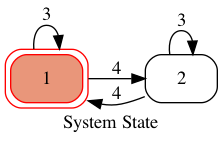

In [7]:
class Model:
    
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))
    
    def is_valid(self):
        return True
    
    def abort_triggered(self):
        return False

model = Model()
machine = CustomMachine(model=model, states=states, transitions=transitions, initial='1', title='System Z6',
                        show_conditions=True, show_state_attributes=True)
model.show_graph()

In [9]:
model.trigger('4')

True

model.state